In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(""), "..")))


In [2]:
from tmac import (
    Machine,
    Model,
    Process,
    Protocol,
    Score,
    TableFormat,
    Technology,
)  # noqa: E402
from tmac.plus import Database, User  # noqa: E402


> Users must log in to the website before they can carry out any of the use cases.

In [3]:
model = Model("REST API Model")

user = User(model, "User")


In [4]:
web_server = Process(
    model,
    "WebServer",
    machine=Machine.VIRTUAL,
    technology=Technology.WEB_APPLICATION,
)

database = Database(
    model,
    "Database",
    machine=Machine.VIRTUAL,
)

In [5]:
web_traffic = user.add_data_flow(
    "WebTraffic",
    destination=web_server,
    protocol=Protocol.HTTPS,
)

web_traffic.transfers(
    "UserCredentials",
    confidentiality=Score.HIGH,
    integrity=Score.HIGH,
    availability=Score.HIGH,
)


In [6]:
database_traffic = web_server.add_data_flow(
    "DatabaseTraffic",
    destination=database,
    protocol=Protocol.SQL,
)

database_traffic.transfers(
    "UserDetails",
    confidentiality=Score.HIGH,
    integrity=Score.HIGH,
    availability=Score.HIGH,
)

In [7]:
print(model.create_risks_table())


ID                  Risk
------------------  --------------------------------------------
CAPEC-63@WebServer  Cross-Site Scripting (XSS) risk at WebServer
CAPEC-66@WebServer  SQL Injection risk at WebServer


In [8]:
print(model.create_backlog_table())

ID                             User Story
-----------------------------  -------------------------------------------------------------------------------
ASVS-5.1.3@CAPEC-63@WebServer  As a Security Champion I want all of the input which can affect control or data
                               flow to be validated so that I can protect my application from malicious
                               manipulation which could lead to unauthorised disclosure or loss of integrity.
ASVS-5.3.4@CAPEC-66@WebServer  As a Security Champion I want all data selection or database queries use
                               parameterized queries so that my application is protected against database
                               injection attacks.
ASVS-5.3.3@CAPEC-63@WebServer  As a Security Champion I want all of the output to be escaped so that I can
                               protect my application against reflected, stored, and DOM based XSS.


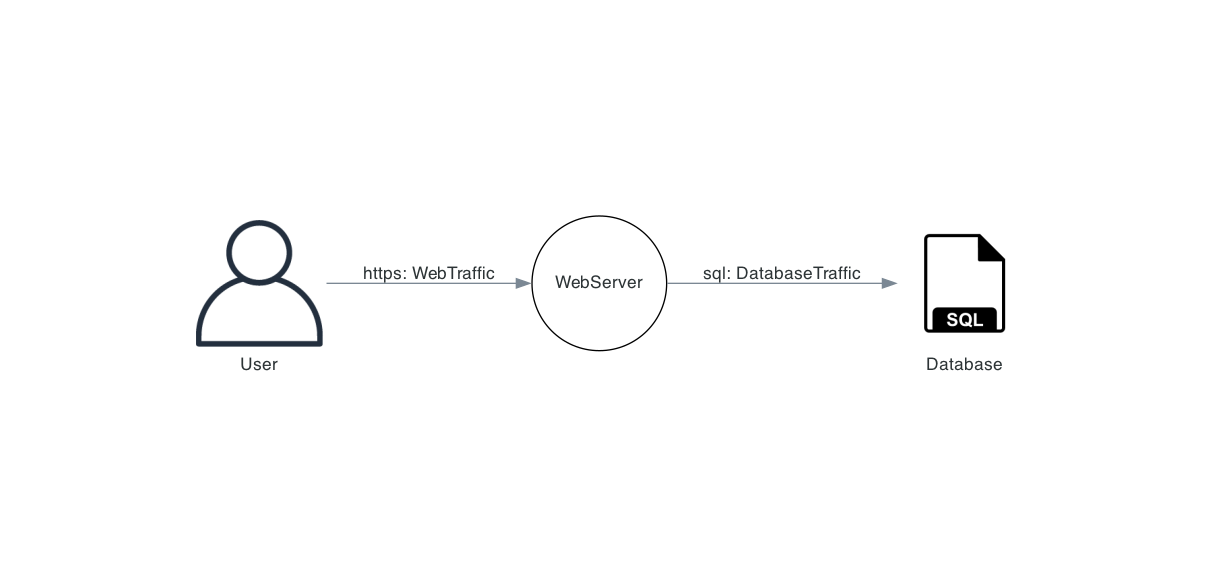

In [9]:
model.create_data_flow_diagram()
